In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import logging
import pandas as pd

tf.get_logger().setLevel(logging.ERROR)
tf.random.set_seed(7)

In [54]:
train_images = pd.read_csv("/content/drive/MyDrive/Colab Data/mnist_train.csv")
test_images = pd.read_csv("/content/drive/MyDrive/Colab Data/mnist_test.csv")
train_labels = train_images.pop("label")
test_labels = test_images.pop("label")

In [55]:
# Standardize data
mean = np.mean(train_images)
stdd = np.std(train_images)
train_images = (train_images - mean) / stdd
test_images = (test_images - mean) / stdd
train_images.fillna(0, inplace=True)
test_images.fillna(0, inplace=True)

In [56]:
# One-hot encode labels
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

In [57]:
inputs = layers.Input(shape=(784))
# flatten_1 = layers.Flatten()(inputs) # Data is already flattened
hidden_1 = layers.Dense(25, activation="relu", kernel_initializer=keras.initializers.glorot_uniform(), bias_initializer="zeros")(inputs)
batch_1 = layers.BatchNormalization()(hidden_1)
hidden_2 = layers.Dense(25, activation="relu", kernel_initializer=keras.initializers.glorot_uniform(), bias_initializer="zeros")(batch_1)
batch_2 = layers.BatchNormalization()(hidden_2)
outputs = layers.Dense(10, activation="softmax", kernel_initializer=keras.initializers.glorot_uniform(), bias_initializer="zeros")(batch_2)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_simple")

In [58]:
model.summary()

Model: "mnist_simple"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_14 (Dense)             (None, 25)                19625     
_________________________________________________________________
batch_normalization_8 (Batch (None, 25)                100       
_________________________________________________________________
dense_15 (Dense)             (None, 25)                650       
_________________________________________________________________
batch_normalization_9 (Batch (None, 25)                100       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                260       
Total params: 20,735
Trainable params: 20,635
Non-trainable params: 100
________________________________________________

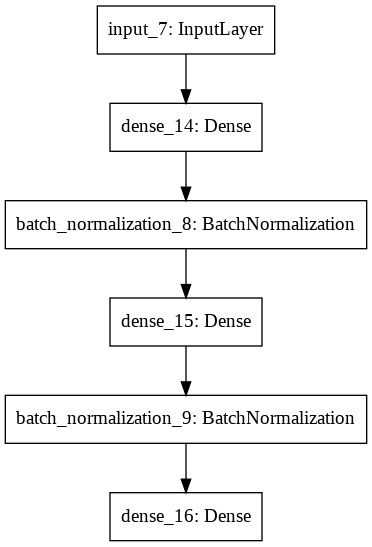

In [59]:
keras.utils.plot_model(model)

In [60]:
model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=["accuracy"])

In [61]:
EPOCHS = 20
BATCH_SIZE = 32
model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(test_images, test_labels), verbose=2, shuffle=True)

Epoch 1/20
1875/1875 - 5s - loss: 0.3035 - accuracy: 0.9086 - val_loss: nan - val_accuracy: 0.9496
Epoch 2/20
1875/1875 - 4s - loss: 0.1913 - accuracy: 0.9426 - val_loss: nan - val_accuracy: 0.9563
Epoch 3/20
1875/1875 - 4s - loss: 0.1634 - accuracy: 0.9510 - val_loss: nan - val_accuracy: 0.9553
Epoch 4/20
1875/1875 - 4s - loss: 0.1458 - accuracy: 0.9551 - val_loss: nan - val_accuracy: 0.9625
Epoch 5/20
1875/1875 - 4s - loss: 0.1329 - accuracy: 0.9590 - val_loss: nan - val_accuracy: 0.9628
Epoch 6/20
1875/1875 - 4s - loss: 0.1235 - accuracy: 0.9616 - val_loss: nan - val_accuracy: 0.9645
Epoch 7/20
1875/1875 - 4s - loss: 0.1143 - accuracy: 0.9637 - val_loss: nan - val_accuracy: 0.9603
Epoch 8/20
1875/1875 - 4s - loss: 0.1112 - accuracy: 0.9646 - val_loss: nan - val_accuracy: 0.9656
Epoch 9/20
1875/1875 - 4s - loss: 0.1051 - accuracy: 0.9664 - val_loss: nan - val_accuracy: 0.9648
Epoch 10/20
1875/1875 - 4s - loss: 0.1016 - accuracy: 0.9686 - val_loss: nan - val_accuracy: 0.9630
Epoch 11/